# import libraries

In [1]:
import pandas as pd
import numpy as np

# import dataset

In [18]:
data_df = pd.read_csv("H:\Level 4 Information Systems\Plastikat\Plastikat Data\companiesPlastic-data-ML.csv")
data_df.head()

,status,number_of_delegates,number_of_offers,number_of_users,company_rateing,years_of_experince,plastic_quantity
0,IN_APPROVAL,18,0,90,0,0,0
1,SUSPENDED,11,17,55,1,6,113
2,APPROVED,1,25,5,5,10,86
3,SUSPENDED,7,43,35,1,4,275
4,APPROVED,9,17,45,4,7,99


# Define x and y

In [3]:
x = data_df.drop(['status','plastic_quantity'], axis=1).values
y = data_df['plastic_quantity'].values 

# split the data into teaining and testing data

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# train the model on the training data

In [5]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
dt = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=3)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

# predict the test result

In [7]:
y_pred = ml.predict(x_test)
ml.predict([[11,17,55,1,6]])

y_pred_2 = dt.predict(x_test)
mse_dt = MSE(y_test,y_pred)
rmse_dt = mse_dt**(1/2)
print(y_pred_2)

[110.03333333   2.48888889 258.66666667 110.03333333 157.89795918
  69.32653061   7.7        258.66666667  69.32653061   3.8125
   7.7        157.89795918 258.66666667 157.89795918   7.7
  69.32653061 110.03333333   3.8125       3.8125       2.48888889
   2.48888889   7.7          7.7         97.05714286   7.7
   3.8125      69.32653061   2.48888889   2.48888889   2.48888889
   2.48888889 110.03333333 110.03333333  97.05714286   7.7
 157.89795918   2.48888889 157.89795918 258.66666667 258.66666667
 110.03333333   7.7          2.48888889  97.05714286 157.89795918
 110.03333333 157.89795918   3.8125       2.48888889   3.8125
   2.48888889   3.8125     157.89795918   3.8125      97.05714286
  69.32653061  69.32653061 258.66666667   2.48888889 157.89795918
   3.8125       3.8125      97.05714286   7.7         97.05714286
   7.7        110.03333333 157.89795918 157.89795918   2.48888889
 157.89795918   7.7        157.89795918 110.03333333 110.03333333
 110.03333333 157.89795918   3.8125    

# Evaluate the model

In [8]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9533303352626061

In [9]:
r2_score(y_test,y_pred_2)

0.8967251807385168

# plot the results

Text(0.5, 1.0, 'Actual vs Predicted')

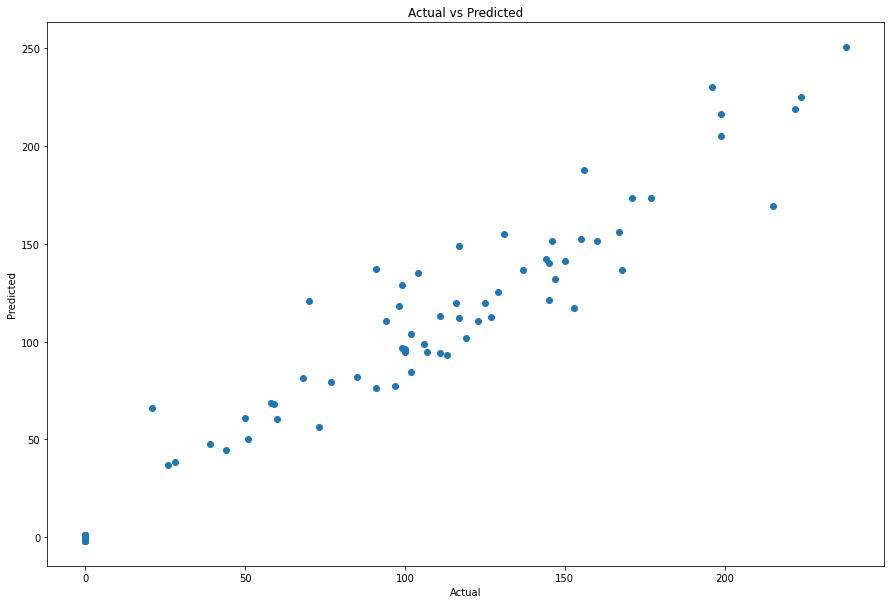

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred, label="Actual test data")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

Text(0.5, 1.0, 'Actual vs Predicted')

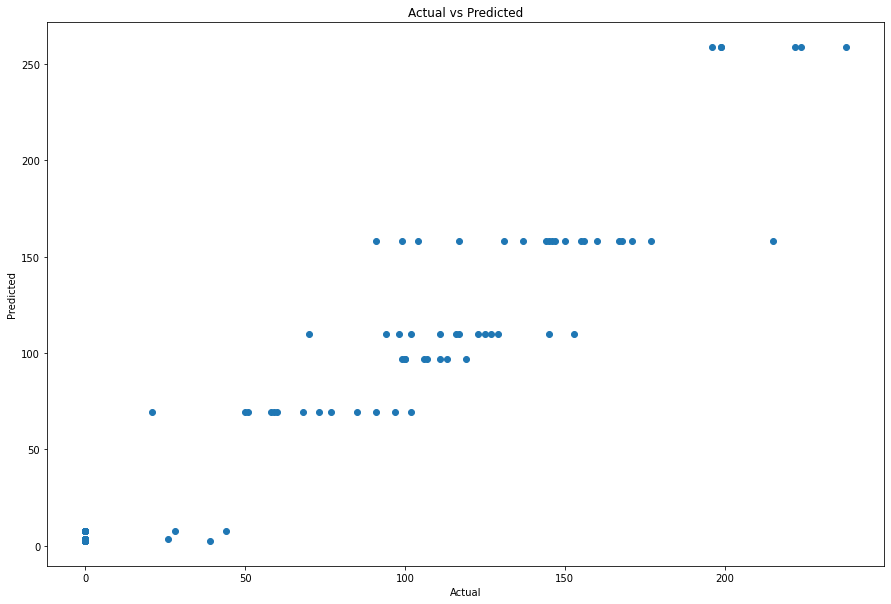

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_2, label="Actual test data")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# predicted values

In [14]:
pred_y_df = pd.DataFrame({'Actual Value' : y_test, 'predicted value' : y_pred, "Difference" : y_test-y_pred})
pred_y_df[0:20]

,Actual Value,predicted value,Difference
0,94,110.574126,-16.574126
1,0,0.678293,-0.678293
2,224,225.253363,-1.253363
3,98,118.139431,-20.139431
4,150,141.395486,8.604514
5,85,82.008536,2.991464
6,0,-0.873214,0.873214
7,222,218.838004,3.161996
8,60,60.160399,-0.160399
9,0,-1.842906,1.842906


In [16]:
pred_y_df_2 = pd.DataFrame({'Actual Value' : y_test, 'predicted value' : y_pred_2, "Difference" : y_test-y_pred_2})
pred_y_df_2[0:20]

,Actual Value,predicted value,Difference
0,94,110.033333,-16.033333
1,0,2.488889,-2.488889
2,224,258.666667,-34.666667
3,98,110.033333,-12.033333
4,150,157.897959,-7.897959
5,85,69.326531,15.673469
6,0,7.700000,-7.700000
7,222,258.666667,-36.666667
8,60,69.326531,-9.326531
9,0,3.812500,-3.812500
